In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tb_diabetes = pl.read_csv('2.10_TB_Diabetes.csv')
tb_tabaco = pl.read_csv('2.11_TB_Tobacco.csv')
tb_alcohol = pl.read_csv('2.12_TB_Alcohol.csv')

# Data cleaning with Pola.rs

In [3]:
tb_diabetes

State/Uts,"No of TB - Diabetes-TB patients with known DM status, of notified)-Public","Percentage of TB - Diabetes-TB patients with known DM status,of notified)-Public","No of TB - Diabetes-TB patients with known DM status, of notified)-Private","Percentage of TB - Diabetes-TB patients with known DM status, of notified)-Private","No of TB - Diabetes-TB patients with known DM status,of notified)-Total","Percentage of TB - Diabetes-TB patients with known DM status, of notified)-Total","No of TB - Diabetes-Patients diagnosed among tested,of those with known DM status)-Public","Percentage of TB - Diabetes- Patients diagnosed among tested,of those with known DM status)-Public","No of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Private","Percentage of TB - Diabetes-Patients diagnosed among tested, of those with known DM status)-Private","No of TB - Diabetes-Patients diagnosed among tested, of those with known DM status)-Total","Percentage of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Total","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Public","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Public","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Private","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Private","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)0Total","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment,of TB-DM)0Total"
str,str,f64,str,str,str,f64,str,f64,str,str,str,f64,str,f64,str,str,str,f64
"""Andaman & Nico…","""518 """,95.2,"""3 ""","""75""","""521 """,95.1,"""97""",18.7,"""1 ""","""33.3""","""98 """,18.8,"""69 """,71.1,"""1 ""","""100""","""70 """,71.4
"""Andhra Pradesh…","""65235 """,98.7,"""26883 ""","""99.6""","""92118 """,98.9,"""8816 """,13.5,"""2940 ""","""10.9""","""11756 """,12.8,"""6282 """,71.3,"""1671 ""","""56.8""","""7953 """,67.7
"""Arunachal Prad…","""2378 """,79.0,"""3 ""","""50""","""2381 """,79.0,"""59 """,2.5,"""0 ""","""0""","""59 """,2.5,"""28 """,47.5,"""NA""","""NA""","""28 """,47.5
"""Assam""","""34011 """,81.0,"""4929 ""","""83.2""","""38940 """,81.2,"""2554 """,7.5,"""499 ""","""10.1""","""3053 """,7.8,"""1003 """,39.3,"""179 ""","""35.9""","""1182 """,38.7
"""Bihar""","""53768 """,66.1,"""74114 ""","""87.7""","""127882 """,77.1,"""3062 """,5.7,"""3801 ""","""5.1""","""6863 """,5.4,"""1489 """,48.6,"""811 ""","""21.3""","""2300 """,33.5
"""Chandigarh""","""3531 """,94.9,"""47 ""","""73.4""","""3578 """,94.6,"""316 """,8.9,"""5 ""","""10.6""","""321 """,9.0,"""248 """,78.5,"""5 ""","""100""","""253 """,78.8
"""Chhattisgarh""","""26987 """,91.6,"""8243 ""","""88.8""","""35230 """,91.0,"""2473 """,9.2,"""639 ""","""7.8""","""3112 """,8.8,"""1184 """,47.9,"""155 ""","""24.3""","""1339 """,43.0
"""Dadra and Naga…","""838 """,99.2,"""76""","""100""","""914 """,99.2,"""56 """,6.7,"""3 ""","""3.9""","""59 """,6.5,"""46 """,82.1,"""2 ""","""66.7""","""48 """,81.4
"""Delhi""","""65700 """,84.2,"""5628 ""","""55""","""71328 """,80.8,"""5323 """,8.1,"""621 ""","""11""","""5944 """,8.3,"""2661 """,50.0,"""168 ""","""27.1""","""2829 """,47.6


In [4]:
# remove blank spaces
columnas_tdb = tb_diabetes.columns[1:]

for c in columnas_tdb:
    tb_diabetes = tb_diabetes.with_columns(tb_diabetes[c].str.replace(' ', ''))

In [5]:
# change null values by 0
for c in columnas_tdb:
    tb_diabetes = tb_diabetes.with_columns(tb_diabetes[c].str.replace('NA', '0'))

In [6]:
# change column data type
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Private'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes-TB patients with known DM status, of notified)-Public'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes-TB patients with known DM status, of notified)-Private'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes-TB patients with known DM status,of notified)-Total'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes-Patients diagnosed among tested,of those with known DM status)-Public'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Public'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Private'].cast(pl.Int64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes['No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)0Total'].cast(pl.Int64))

In [7]:
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[2]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[4]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[6]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[8]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[10]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[11]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[12]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[14]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[16]].cast(pl.Float64))
tb_diabetes = tb_diabetes.with_columns(tb_diabetes[tb_diabetes.columns[18]].cast(pl.Float64))

In [8]:
tb_diabetes

State/Uts,"No of TB - Diabetes-TB patients with known DM status, of notified)-Public","Percentage of TB - Diabetes-TB patients with known DM status,of notified)-Public","No of TB - Diabetes-TB patients with known DM status, of notified)-Private","Percentage of TB - Diabetes-TB patients with known DM status, of notified)-Private","No of TB - Diabetes-TB patients with known DM status,of notified)-Total","Percentage of TB - Diabetes-TB patients with known DM status, of notified)-Total","No of TB - Diabetes-Patients diagnosed among tested,of those with known DM status)-Public","Percentage of TB - Diabetes- Patients diagnosed among tested,of those with known DM status)-Public","No of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Private","Percentage of TB - Diabetes-Patients diagnosed among tested, of those with known DM status)-Private","No of TB - Diabetes-Patients diagnosed among tested, of those with known DM status)-Total","Percentage of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Total","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Public","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Public","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Private","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Private","No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)0Total","Percentage of TB - Diabetes- patients initiated on Anti-diabetic treatment,of TB-DM)0Total"
str,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,f64,f64,i64,f64,i64,f64,i64,f64
"""Andaman & Nico…",518,95.2,3,75.0,521,95.1,97,18.7,1,33.3,98.0,18.8,69,71.1,1,100.0,70,71.4
"""Andhra Pradesh…",65235,98.7,26883,99.6,92118,98.9,8816,13.5,2940,10.9,11756.0,12.8,6282,71.3,1671,56.8,7953,67.7
"""Arunachal Prad…",2378,79.0,3,50.0,2381,79.0,59,2.5,0,0.0,59.0,2.5,28,47.5,0,0.0,28,47.5
"""Assam""",34011,81.0,4929,83.2,38940,81.2,2554,7.5,499,10.1,3053.0,7.8,1003,39.3,179,35.9,1182,38.7
"""Bihar""",53768,66.1,74114,87.7,127882,77.1,3062,5.7,3801,5.1,6863.0,5.4,1489,48.6,811,21.3,2300,33.5
"""Chandigarh""",3531,94.9,47,73.4,3578,94.6,316,8.9,5,10.6,321.0,9.0,248,78.5,5,100.0,253,78.8
"""Chhattisgarh""",26987,91.6,8243,88.8,35230,91.0,2473,9.2,639,7.8,3112.0,8.8,1184,47.9,155,24.3,1339,43.0
"""Dadra and Naga…",838,99.2,76,100.0,914,99.2,56,6.7,3,3.9,59.0,6.5,46,82.1,2,66.7,48,81.4
"""Delhi""",65700,84.2,5628,55.0,71328,80.8,5323,8.1,621,11.0,5944.0,8.3,2661,50.0,168,27.1,2829,47.6


In [9]:
# apply the same formatting for the other tables
tb_alcohol

State/Uts,"No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Public","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Public","No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Private","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Private","No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Total","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Total","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Public","Percentage of TB - Alcohol-Alcohol users identified amongst screened,of those with known alcohol usage status)-Public","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Private","Percentage of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Private","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Total","Percentage of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Total","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Public","Percentage of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Public","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Private","Percentage of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Private","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Total","Percentage of No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Total"
str,str,f64,str,str,str,f64,str,f64,str,f64,str,f64,str,f64,str,str,str,str
"""Andaman & Nico…","""490 """,90.1,"""3 ""","""75""","""493 """,90.0,"""90 """,18.4,"""0 """,0.0,"""90 """,18.3,"""26 """,28.9,"""NA""","""NA""","""26 ""","""28.9"""
"""Andhra Pradesh…","""63257 """,95.7,"""26303 ""","""97.5""","""89560 """,96.2,"""8187 """,12.9,"""1208 """,4.6,"""9395 """,10.5,"""1901 """,23.2,"""265 ""","""21.9""","""2166 ""","""23.1"""
"""Arunachal Prad…","""2240 """,74.4,"""3 ""","""50""","""2243 """,74.4,"""245 """,10.9,"""0 """,0.0,"""245 """,10.9,"""140 """,57.1,"""NA""","""NA""","""140 ""","""57.1"""
"""Assam""","""29582 """,70.4,"""4366 ""","""73.7""","""33948 """,70.8,"""5161 """,17.4,"""179 """,4.1,"""5340 """,15.7,"""1244 """,24.1,"""71 ""","""39.7""","""1315 ""","""24.6"""
"""Bihar""","""44246 """,54.4,"""35745 ""","""42.3""","""79991 """,48.2,"""781 """,1.8,"""254 """,0.7,"""1035 """,1.3,"""254 """,32.5,"""9 ""","""3.5""","""263 ""","""25.4"""
"""Chandigarh""","""3487 """,93.8,"""47 ""","""73.4""","""3534 """,93.4,"""209 """,6.0,"""1 """,2.1,"""210 """,5.9,"""39 """,18.7,"""1 ""","""100""","""40 ""","""19"""
"""Chhattisgarh""","""24653 """,83.7,"""5734 ""","""61.8""","""30387 """,78.5,"""5395 """,21.9,"""247 """,4.3,"""5642 """,18.6,"""2606 """,48.3,"""114 ""","""46.2""","""2720 ""","""48.2"""
"""Dadra and Naga…","""562 """,66.5,"""58 ""","""76.3""","""620 """,67.3,"""59 """,10.5,"""3 """,5.2,"""62 """,10.0,"""31 """,52.5,"""1 ""","""33.3""","""32 ""","""51.6"""
"""Delhi""","""50682 """,65.0,"""1660 ""","""16.2""","""52342 """,59.3,"""3074 """,6.1,"""18 """,1.1,"""3092 """,5.9,"""619 """,20.1,"""4 ""","""22.2""","""623 ""","""20.1"""


In [10]:
columnas_tba = tb_alcohol.columns[1:]

for c in columnas_tba:
    tb_alcohol = tb_alcohol.with_columns(tb_alcohol[c].str.replace(' ', ''))

In [11]:
for c in columnas_tba:
    tb_alcohol = tb_alcohol.with_columns(tb_alcohol[c].str.replace('NA', '0'))

In [12]:
# mass convert
for i in range(1,len(tb_alcohol.columns)):
    if i%2 == 0:
        tb_alcohol = tb_alcohol.with_columns(tb_alcohol[tb_alcohol.columns[i]].cast(pl.Float64))
    else:
        tb_alcohol = tb_alcohol.with_columns(tb_alcohol[tb_alcohol.columns[i]].cast(pl.Int64))

In [13]:
tb_alcohol

State/Uts,"No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Public","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Public","No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Private","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Private","No of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Total","% of TB - Alcohol-TB patients with known Alcohol usage status, of notified)-Total","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Public","Percentage of TB - Alcohol-Alcohol users identified amongst screened,of those with known alcohol usage status)-Public","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Private","Percentage of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Private","No of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Total","Percentage of TB - Alcohol-Alcohol users identified amongst screened, of those with known alcohol usage status)-Total","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Public","Percentage of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Public","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Private","Percentage of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Private","No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Total","Percentage of No of TB - Alcohol-Alcohol users linked with Deaddiction centres, of alcohol users)-Total"
str,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64
"""Andaman & Nico…",490,90.1,3,75.0,493,90.0,90,18.4,0,0.0,90,18.3,26,28.9,0,0.0,26,28.9
"""Andhra Pradesh…",63257,95.7,26303,97.5,89560,96.2,8187,12.9,1208,4.6,9395,10.5,1901,23.2,265,21.9,2166,23.1
"""Arunachal Prad…",2240,74.4,3,50.0,2243,74.4,245,10.9,0,0.0,245,10.9,140,57.1,0,0.0,140,57.1
"""Assam""",29582,70.4,4366,73.7,33948,70.8,5161,17.4,179,4.1,5340,15.7,1244,24.1,71,39.7,1315,24.6
"""Bihar""",44246,54.4,35745,42.3,79991,48.2,781,1.8,254,0.7,1035,1.3,254,32.5,9,3.5,263,25.4
"""Chandigarh""",3487,93.8,47,73.4,3534,93.4,209,6.0,1,2.1,210,5.9,39,18.7,1,100.0,40,19.0
"""Chhattisgarh""",24653,83.7,5734,61.8,30387,78.5,5395,21.9,247,4.3,5642,18.6,2606,48.3,114,46.2,2720,48.2
"""Dadra and Naga…",562,66.5,58,76.3,620,67.3,59,10.5,3,5.2,62,10.0,31,52.5,1,33.3,32,51.6
"""Delhi""",50682,65.0,1660,16.2,52342,59.3,3074,6.1,18,1.1,3092,5.9,619,20.1,4,22.2,623,20.1


In [14]:
tb_tabaco

State/Uts,"No of Tobacco-TB patients with known Tobacco usage status, of notified)-Public","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Public","No of Tobacco-TB patients with known Tobacco usage status,of notified)-Private","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Private","No of Tobacco-TB patients with known Tobacco usage status, of notified)-Total","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Total","No of Tobacco users identified amongst screened, of those with known tobacco usage status)-Public","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Public","No of Tobacco users identified amongst screened,of those with known tobacco usage status)-Private","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Private","No of Tobacco users identified amongst screened,of those with known tobacco usage status)-Total","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Total","No of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Public","Percentage of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Public","No of Tobacco users linked with Tobacco cessation centres,of tobacco users)-Private","Percentage of Tobacco users linked with Tobacco cessation centres, n (% of tobacco users)-Private","No of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Total","Percentage of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Total"
str,str,f64,str,str,str,f64,str,f64,str,str,str,f64,str,f64,str,str,str,f64
"""Andaman & Nico…","""495 """,91.0,"""3 ""","""75""","""498 """,90.9,"""89 """,18.0,"""0""","""0""","""89 """,17.9,"""30 """,33.7,"""NA""","""NA""","""30 """,33.7
"""Andhra Pradesh…","""63627 """,96.2,"""26477 ""","""98.1""","""90104 """,96.8,"""9786 """,15.4,"""1409 ""","""5.3""","""11195 """,12.4,"""2456 """,25.1,"""326 ""","""23.1""","""2782 """,24.9
"""Arunachal Prad…","""2256 """,75.0,"""3 ""","""50""","""2259 """,74.9,"""303 """,13.4,"""0 ""","""0""","""303 """,13.4,"""171 """,56.4,"""NA""","""NA""","""171 """,56.4
"""Assam""","""30134 """,71.7,"""4074 ""","""68.8""","""34208 """,71.4,"""7929 """,26.3,"""325 ""","""8""","""8254 """,24.1,"""1497 """,18.9,"""93 ""","""28.6""","""1590 """,19.3
"""Bihar""","""44248 """,54.4,"""36165 ""","""42.8""","""80413 """,48.5,"""4139 """,9.4,"""1152 ""","""3.2""","""5291 """,6.6,"""917 """,22.2,"""41 ""","""3.6""","""958 """,18.1
"""Chandigarh""","""3508 """,94.3,"""47 ""","""73.4""","""3555 """,94.0,"""305 """,8.7,"""2 ""","""4.3""","""307 """,8.6,"""60 """,19.7,"""0 ""","""0""","""60 """,19.5
"""Chhattisgarh""","""25332 """,86.0,"""5815 ""","""62.7""","""31147 """,80.4,"""7986 """,31.5,"""336 ""","""5.8""","""8322 """,26.7,"""3595 """,45.0,"""140 ""","""41.7""","""3735 """,44.9
"""Dadra and Naga…","""548 """,64.9,"""57 ""","""75""","""605 """,65.7,"""67 """,12.2,"""2 ""","""3.5""","""69 """,11.4,"""38 """,56.7,"""2 ""","""100""","""40 """,58.0
"""Delhi""","""51623 """,66.2,"""1686 ""","""16.5""","""53309 """,60.4,"""3440 """,6.7,"""16 ""","""0.9""","""3456 """,6.5,"""777 """,22.6,"""5 ""","""31.3""","""782 """,22.6


In [15]:
columnas_tbt = tb_tabaco.columns[1:]

for c in columnas_tbt:
    tb_tabaco = tb_tabaco.with_columns(tb_tabaco[c].str.replace(' ', ''))

for c in columnas_tbt:
    tb_tabaco = tb_tabaco.with_columns(tb_tabaco[c].str.replace('NA', '0'))

In [16]:
for i in range(1,len(tb_tabaco.columns)):
    if i%2 == 0:
        tb_tabaco = tb_tabaco.with_columns(tb_tabaco[tb_tabaco.columns[i]].cast(pl.Float64))
    else:
        tb_tabaco = tb_tabaco.with_columns(tb_tabaco[tb_tabaco.columns[i]].cast(pl.Int64))

In [17]:
tb_tabaco

State/Uts,"No of Tobacco-TB patients with known Tobacco usage status, of notified)-Public","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Public","No of Tobacco-TB patients with known Tobacco usage status,of notified)-Private","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Private","No of Tobacco-TB patients with known Tobacco usage status, of notified)-Total","% of Tobacco-TB patients with known Tobacco usage status, of notified)-Total","No of Tobacco users identified amongst screened, of those with known tobacco usage status)-Public","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Public","No of Tobacco users identified amongst screened,of those with known tobacco usage status)-Private","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Private","No of Tobacco users identified amongst screened,of those with known tobacco usage status)-Total","Percentage of Tobacco users identified amongst screened, of those with known tobacco usage status)-Total","No of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Public","Percentage of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Public","No of Tobacco users linked with Tobacco cessation centres,of tobacco users)-Private","Percentage of Tobacco users linked with Tobacco cessation centres, n (% of tobacco users)-Private","No of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Total","Percentage of Tobacco users linked with Tobacco cessation centres, of tobacco users)-Total"
str,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64,i64,f64
"""Andaman & Nico…",495,91.0,3,75.0,498,90.9,89,18.0,0,0.0,89,17.9,30,33.7,0,0.0,30,33.7
"""Andhra Pradesh…",63627,96.2,26477,98.1,90104,96.8,9786,15.4,1409,5.3,11195,12.4,2456,25.1,326,23.1,2782,24.9
"""Arunachal Prad…",2256,75.0,3,50.0,2259,74.9,303,13.4,0,0.0,303,13.4,171,56.4,0,0.0,171,56.4
"""Assam""",30134,71.7,4074,68.8,34208,71.4,7929,26.3,325,8.0,8254,24.1,1497,18.9,93,28.6,1590,19.3
"""Bihar""",44248,54.4,36165,42.8,80413,48.5,4139,9.4,1152,3.2,5291,6.6,917,22.2,41,3.6,958,18.1
"""Chandigarh""",3508,94.3,47,73.4,3555,94.0,305,8.7,2,4.3,307,8.6,60,19.7,0,0.0,60,19.5
"""Chhattisgarh""",25332,86.0,5815,62.7,31147,80.4,7986,31.5,336,5.8,8322,26.7,3595,45.0,140,41.7,3735,44.9
"""Dadra and Naga…",548,64.9,57,75.0,605,65.7,67,12.2,2,3.5,69,11.4,38,56.7,2,100.0,40,58.0
"""Delhi""",51623,66.2,1686,16.5,53309,60.4,3440,6.7,16,0.9,3456,6.5,777,22.6,5,31.3,782,22.6


# Data visualization

Convert the dataframe from polars to pandas in order to better use Seaborn, the "India" row is discarded for being total

In [ ]:
tbt = tb_tabaco[0:36,:].to_pandas()

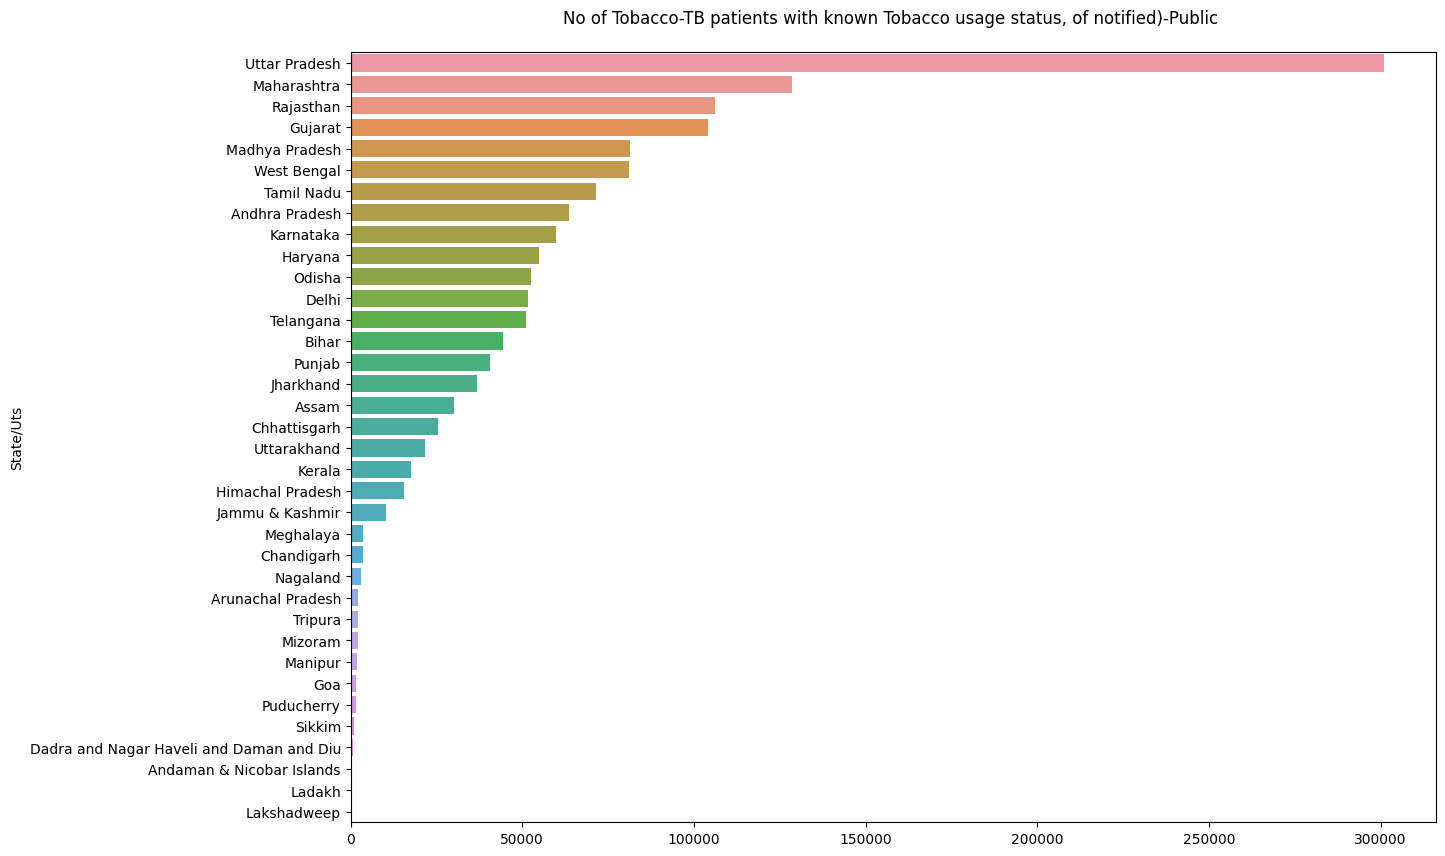

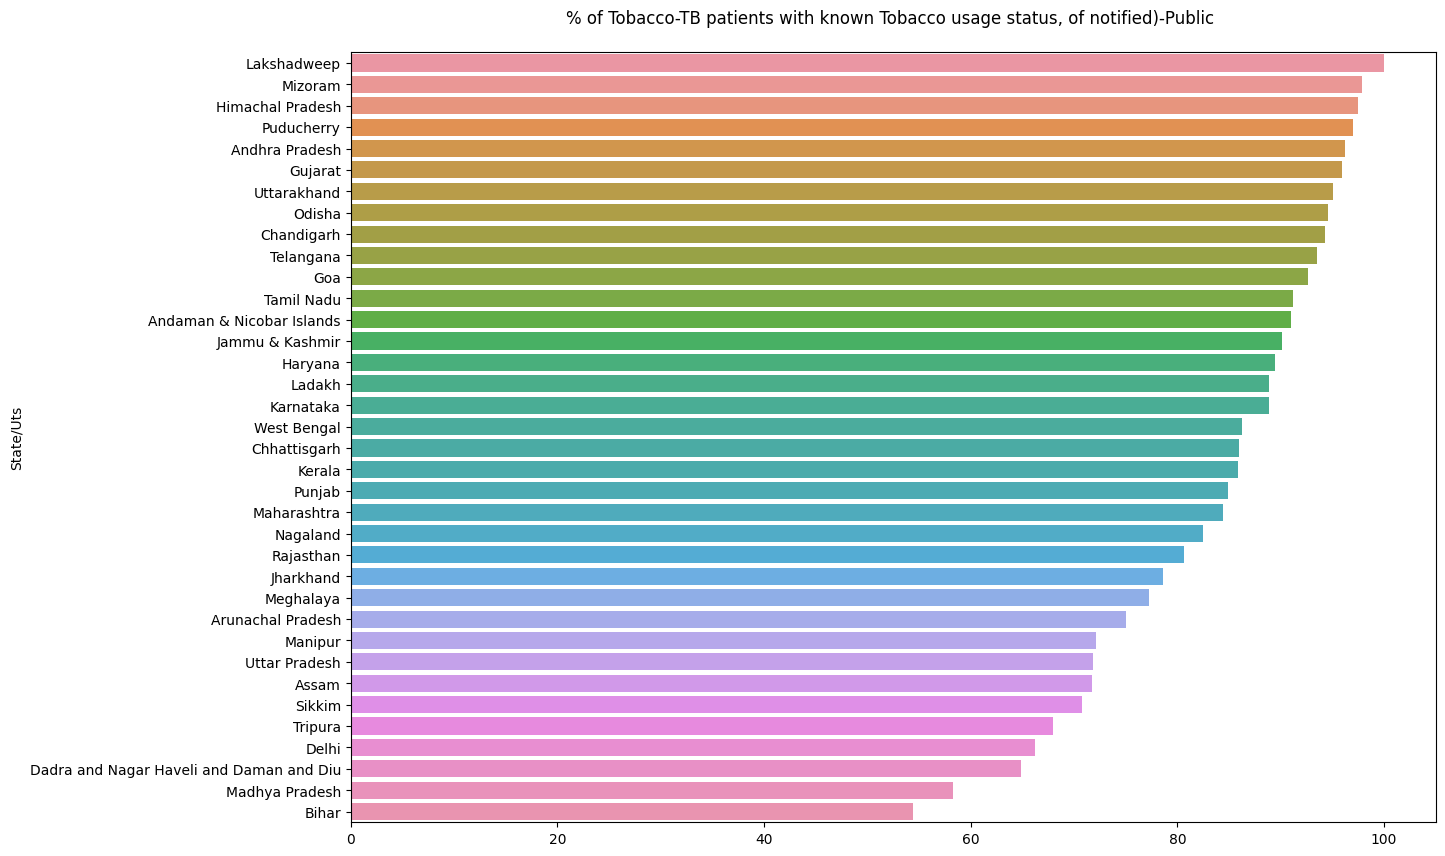

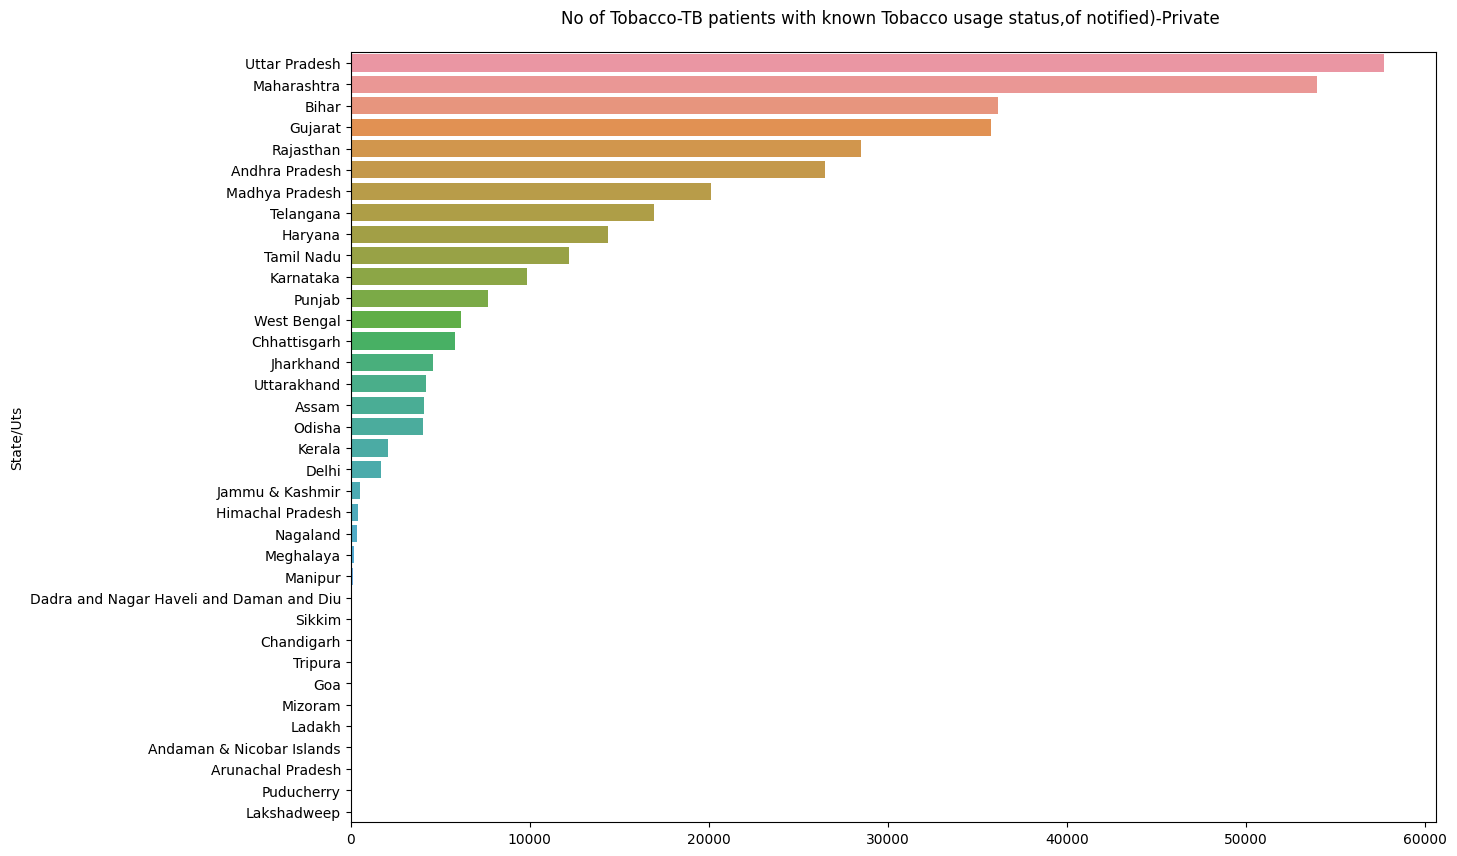

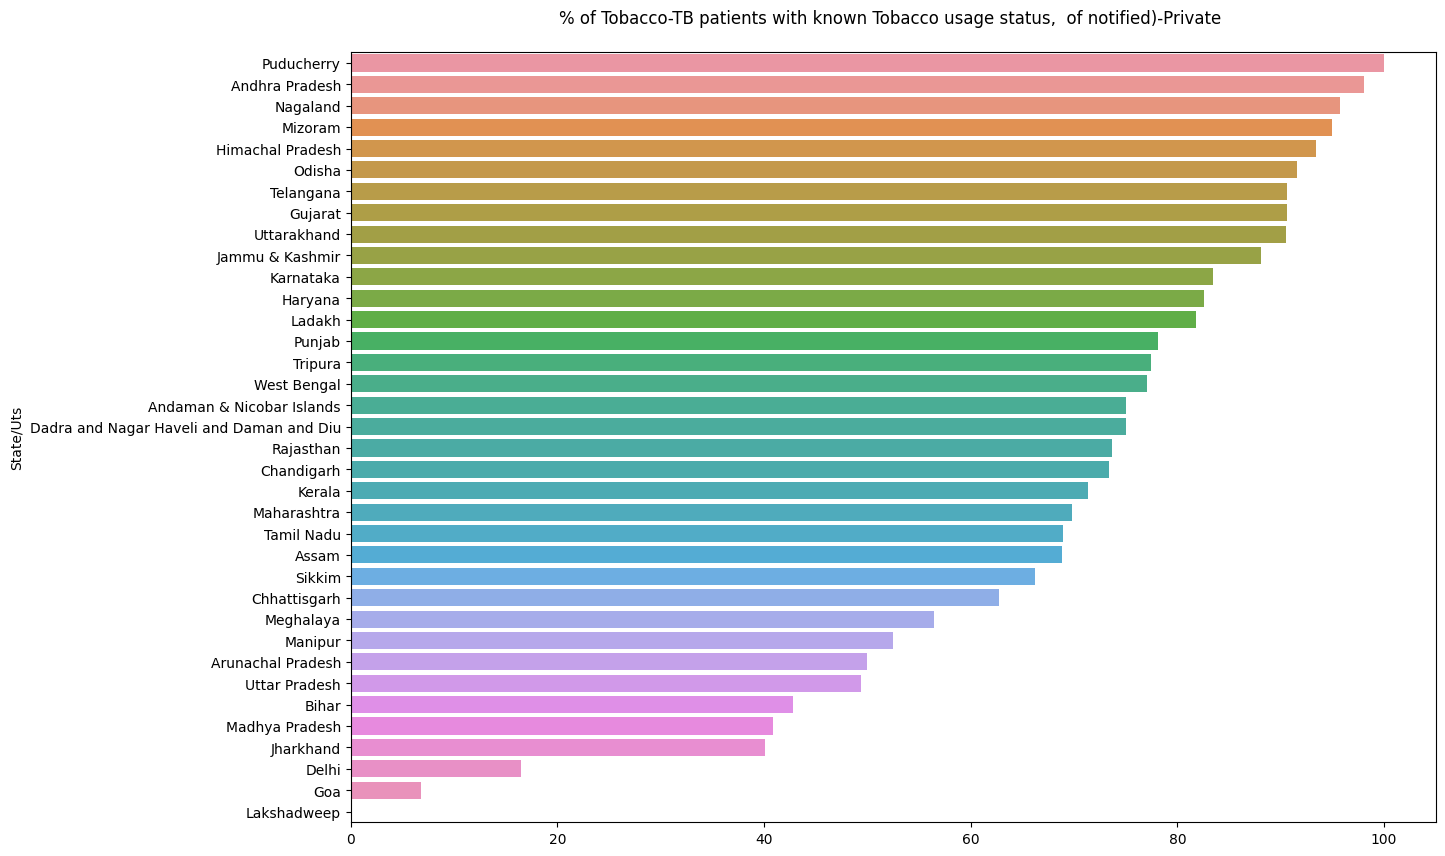

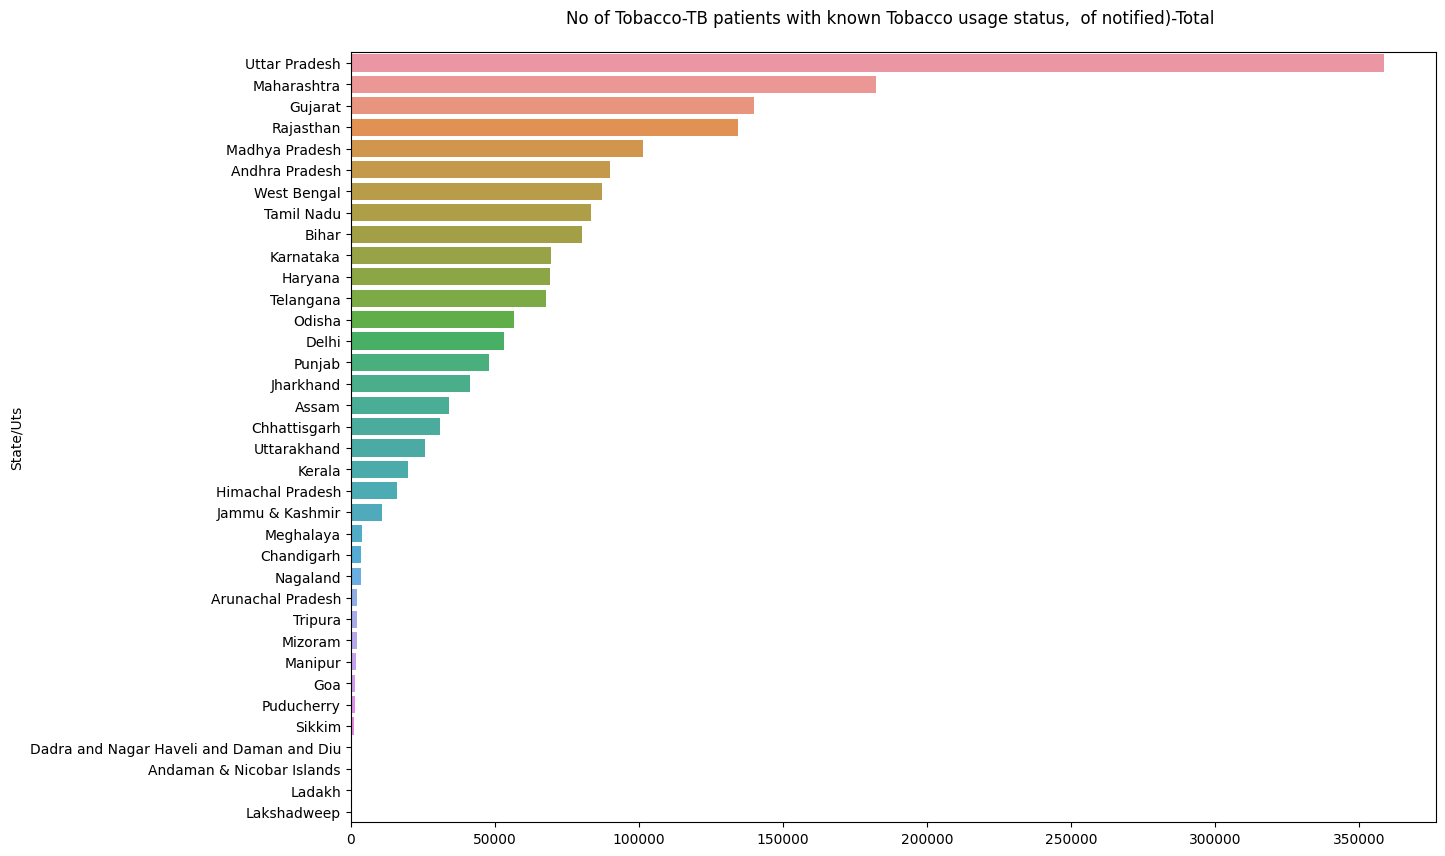

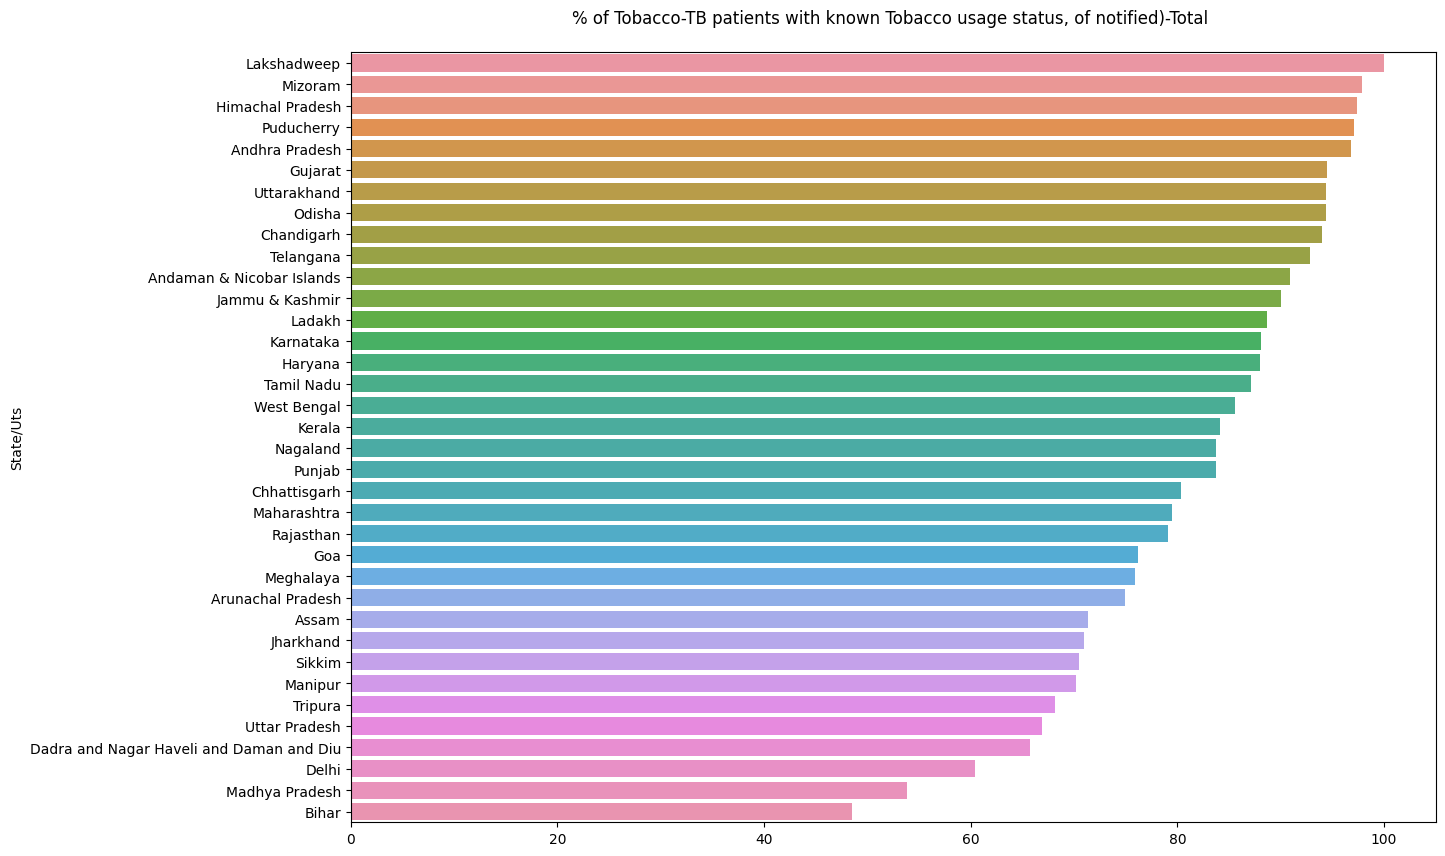

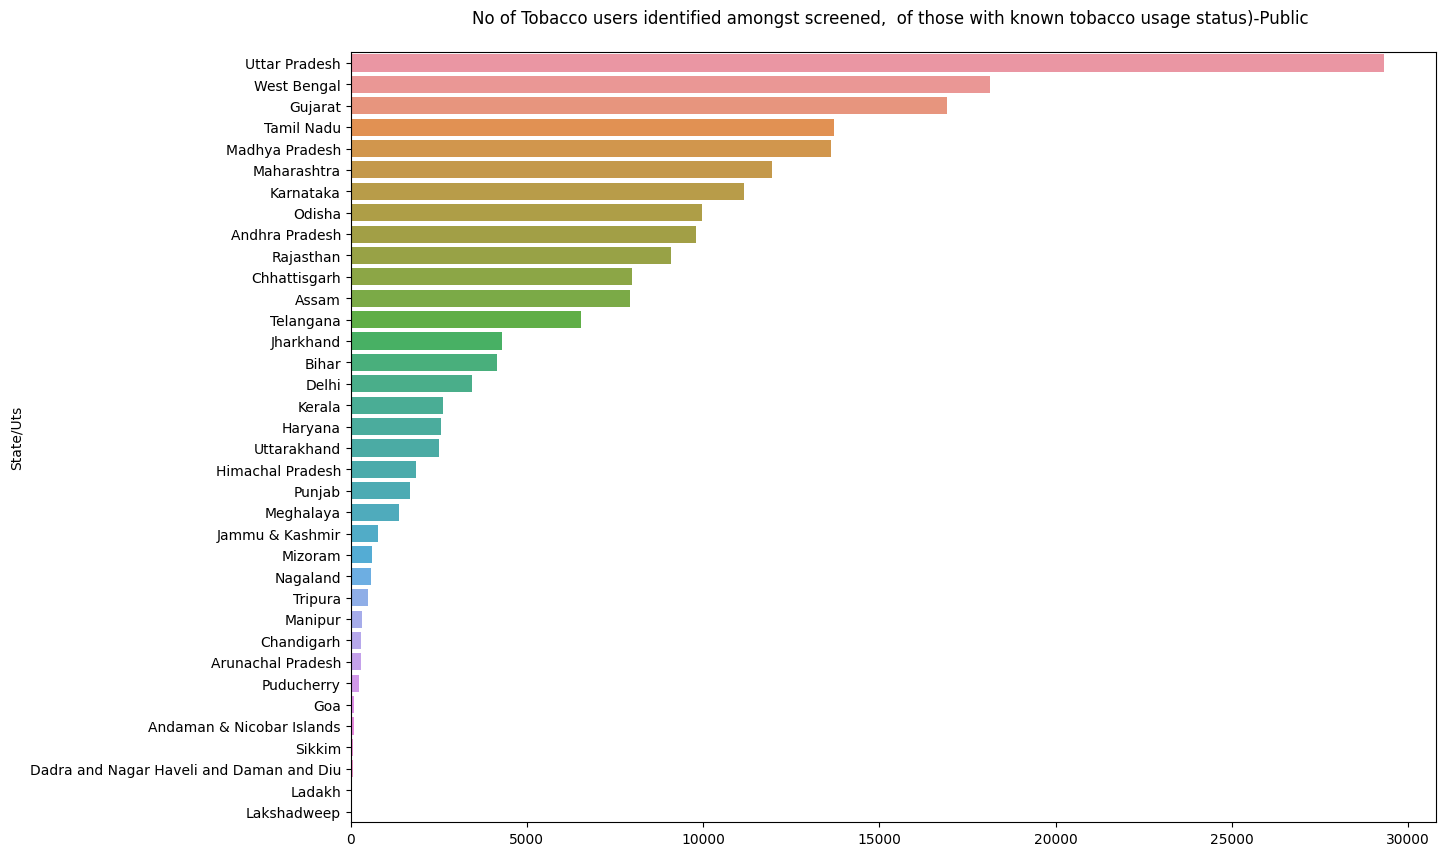

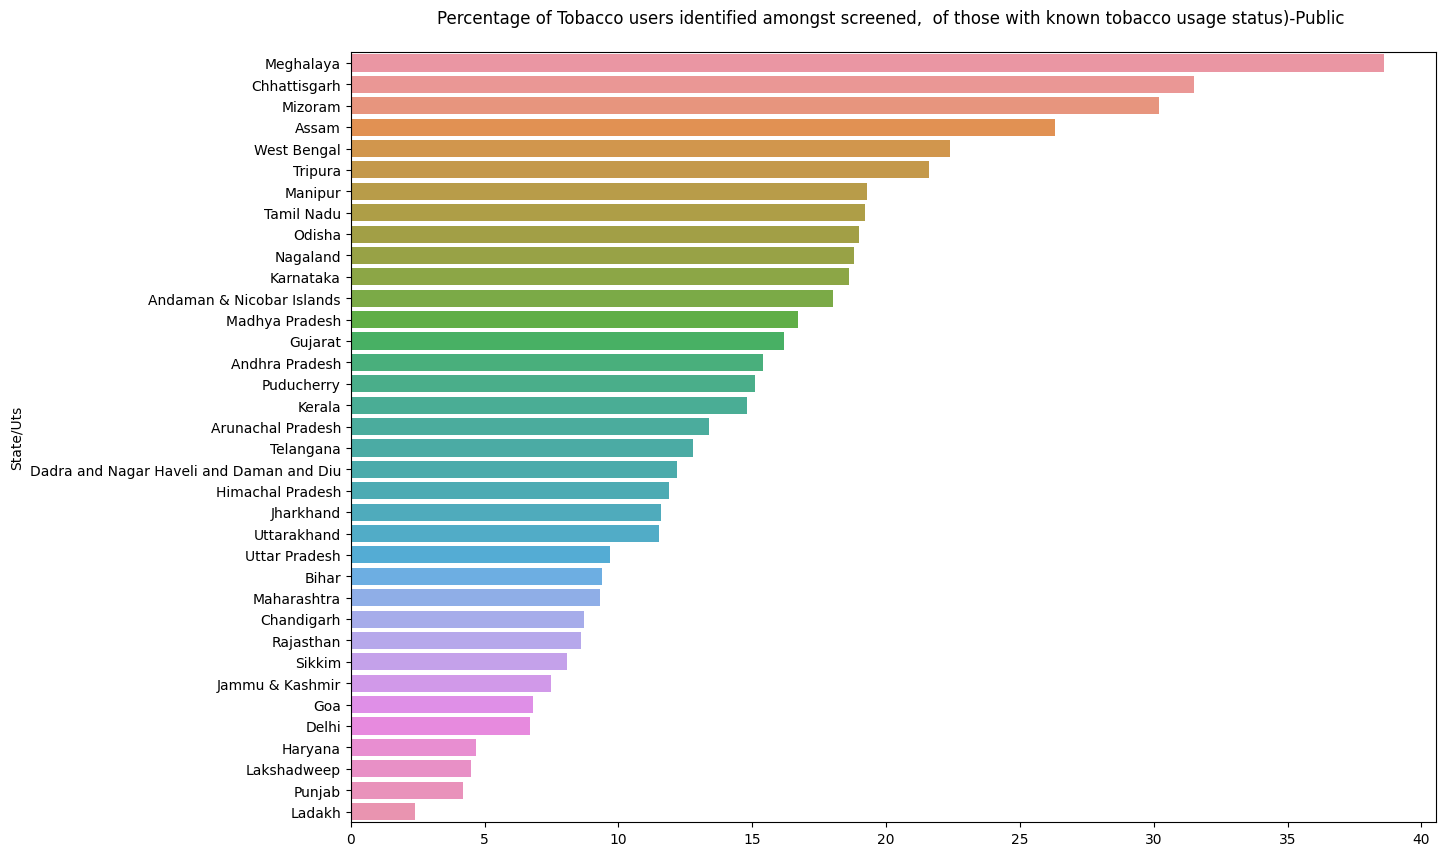

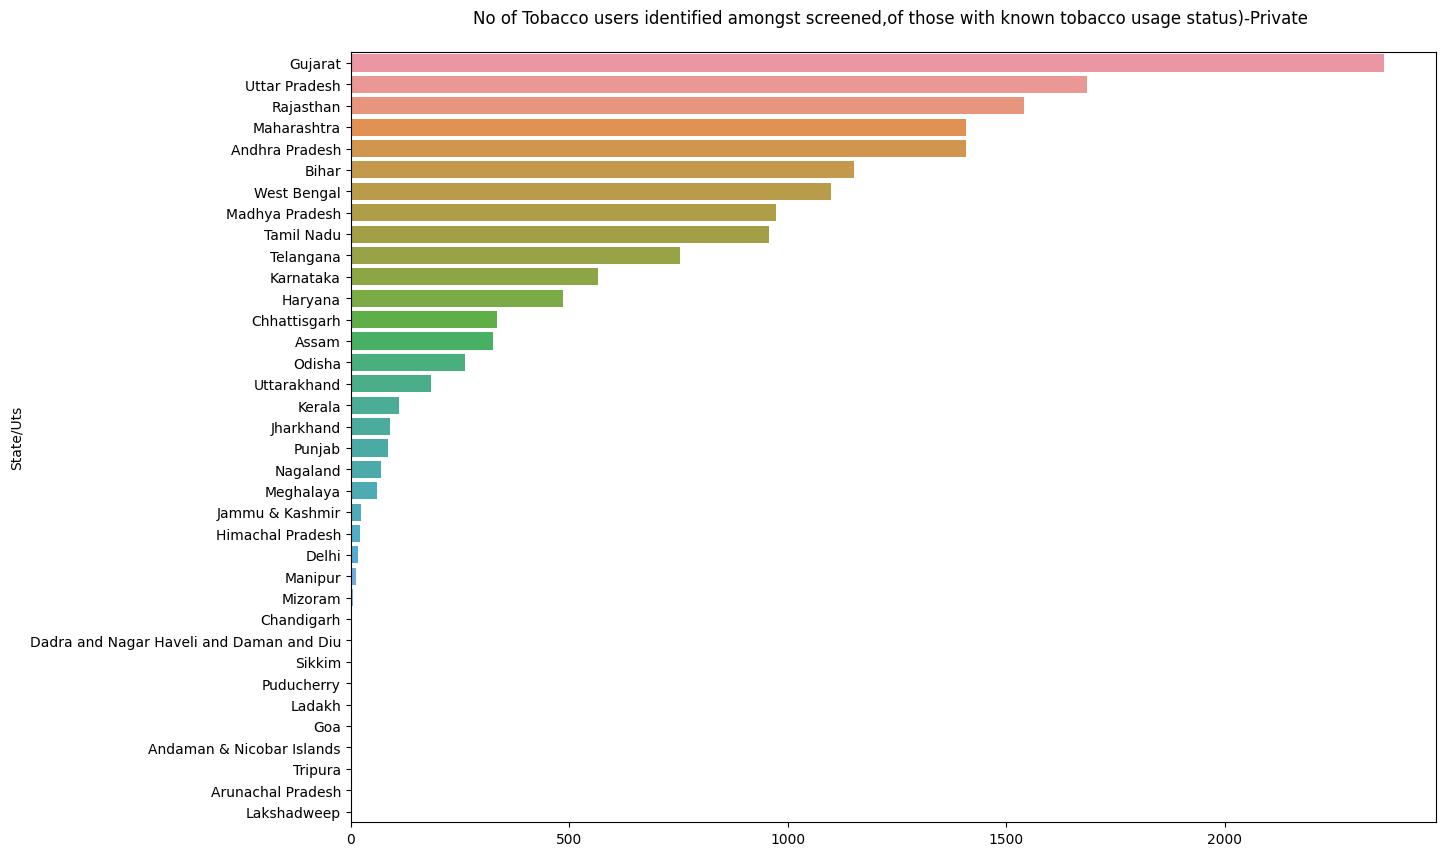

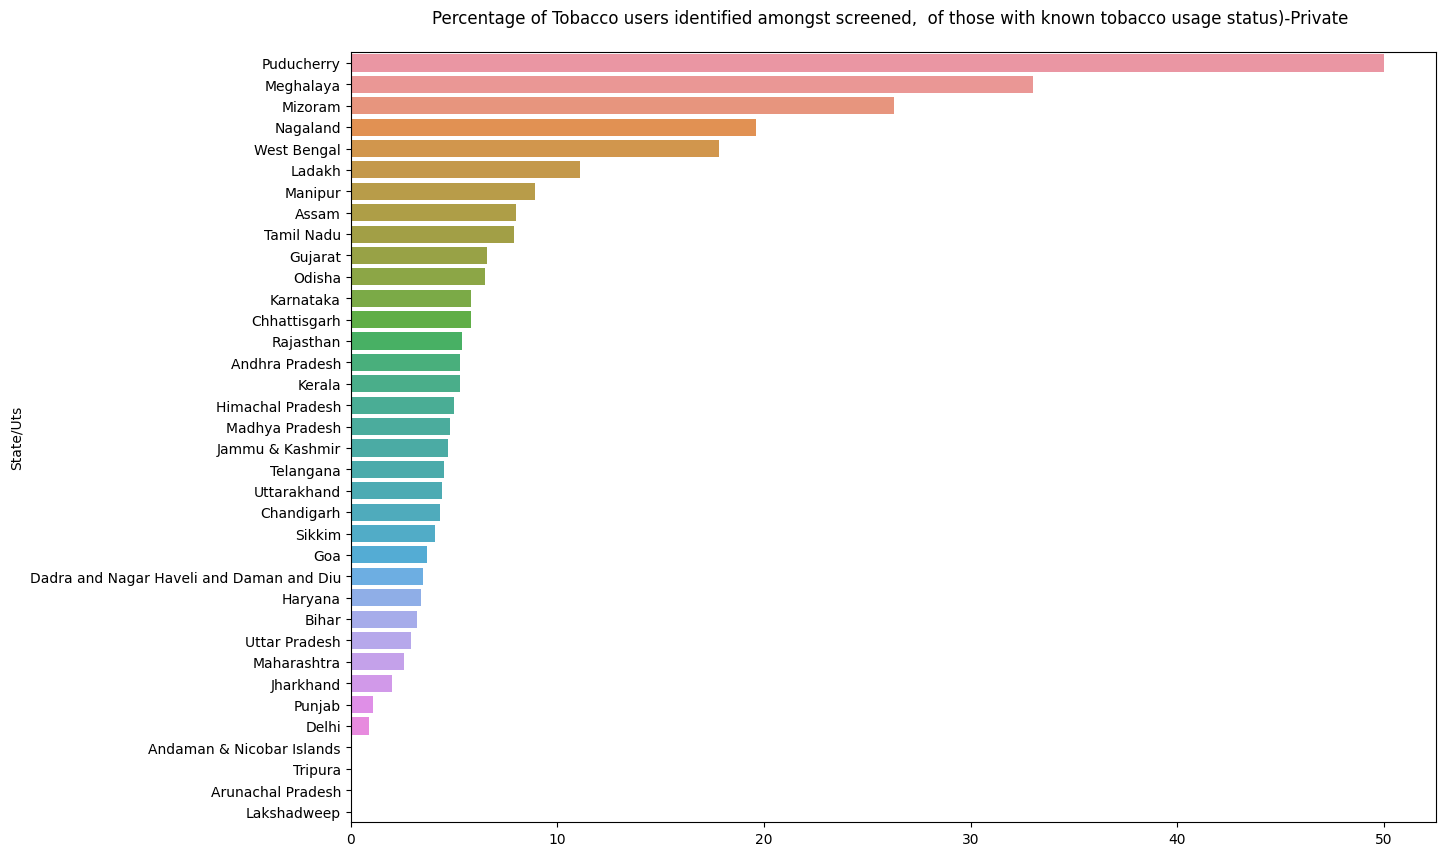

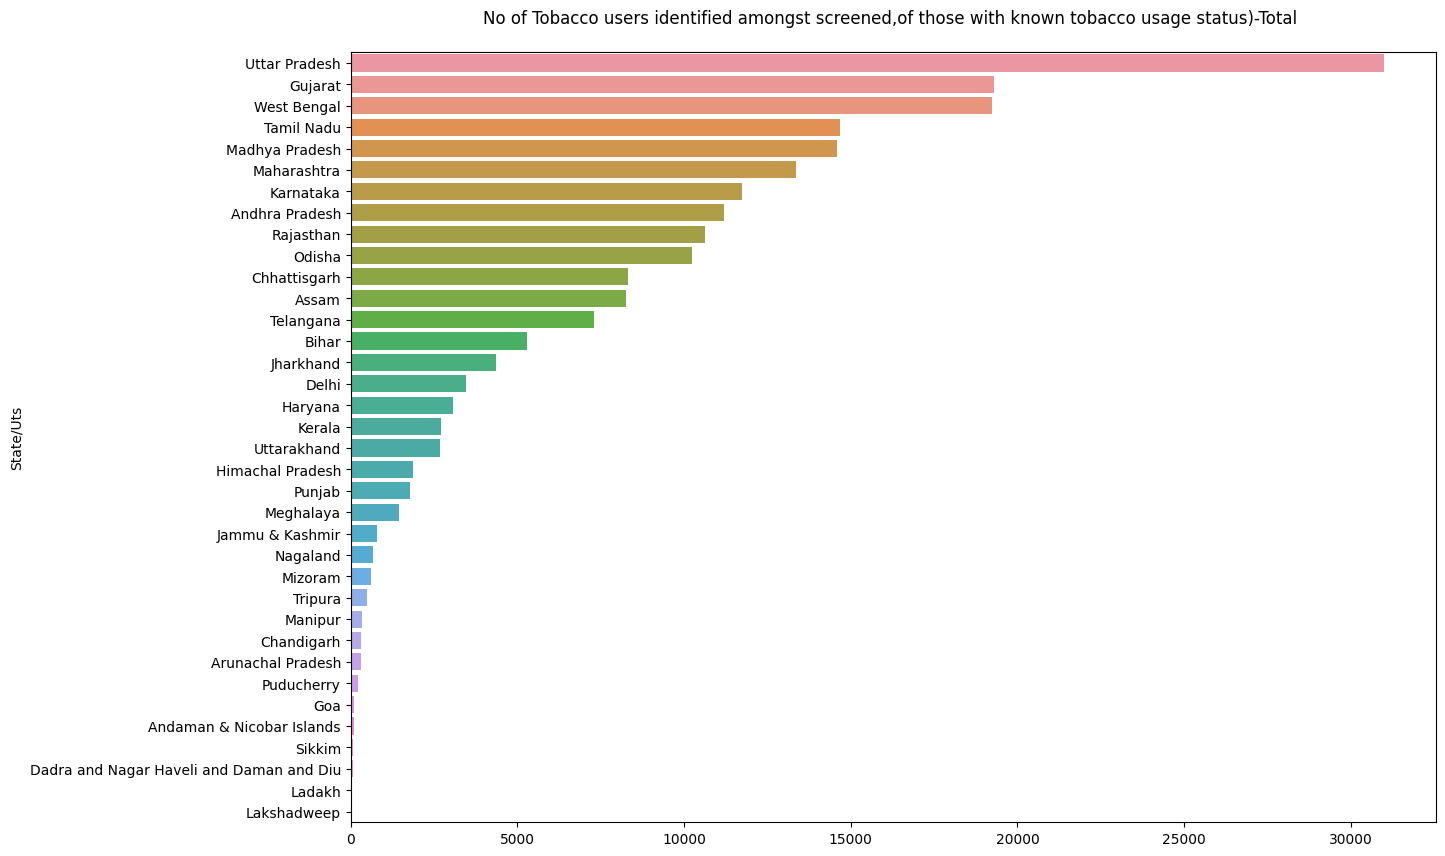

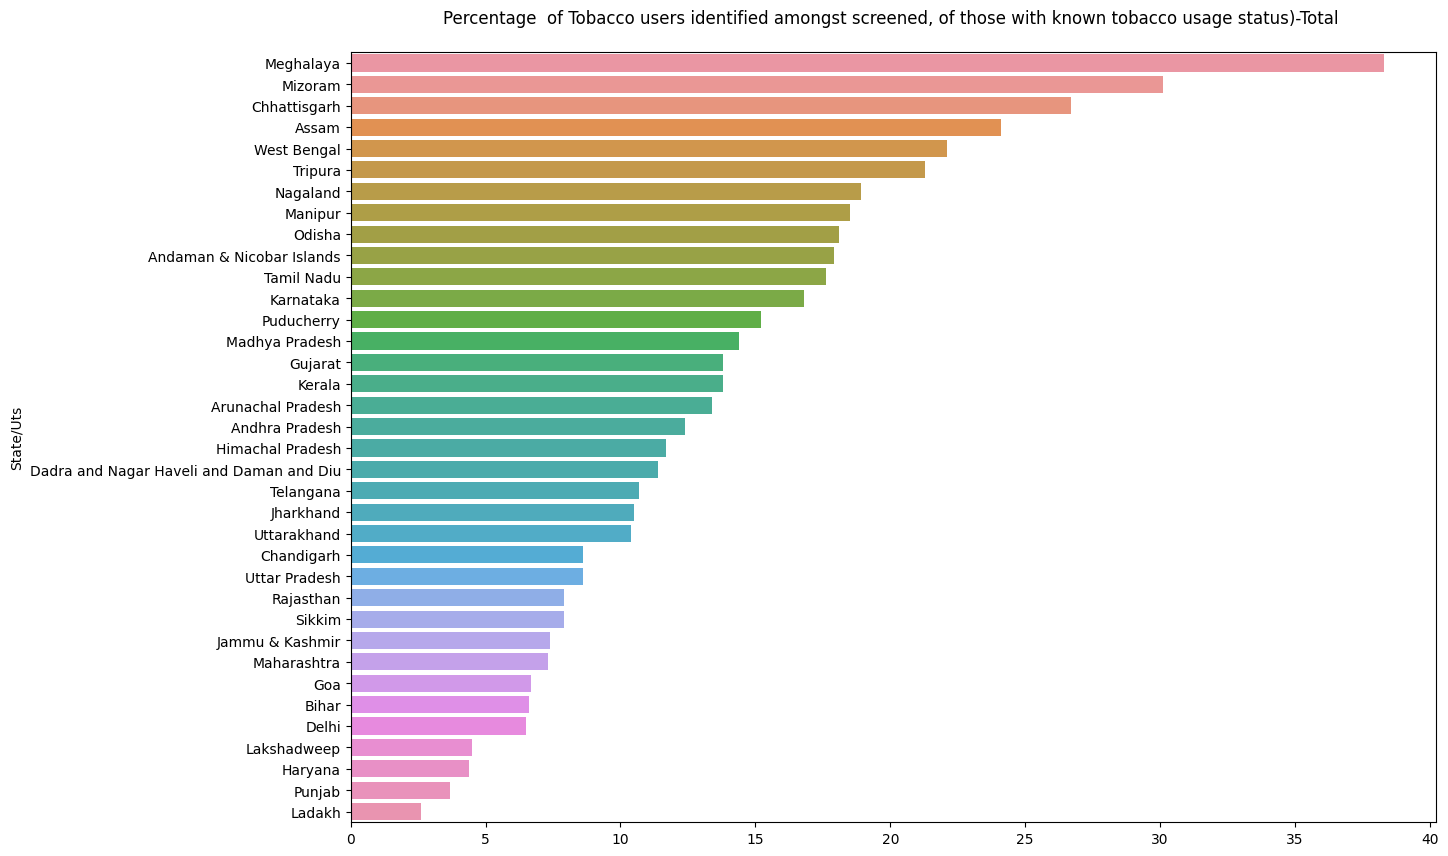

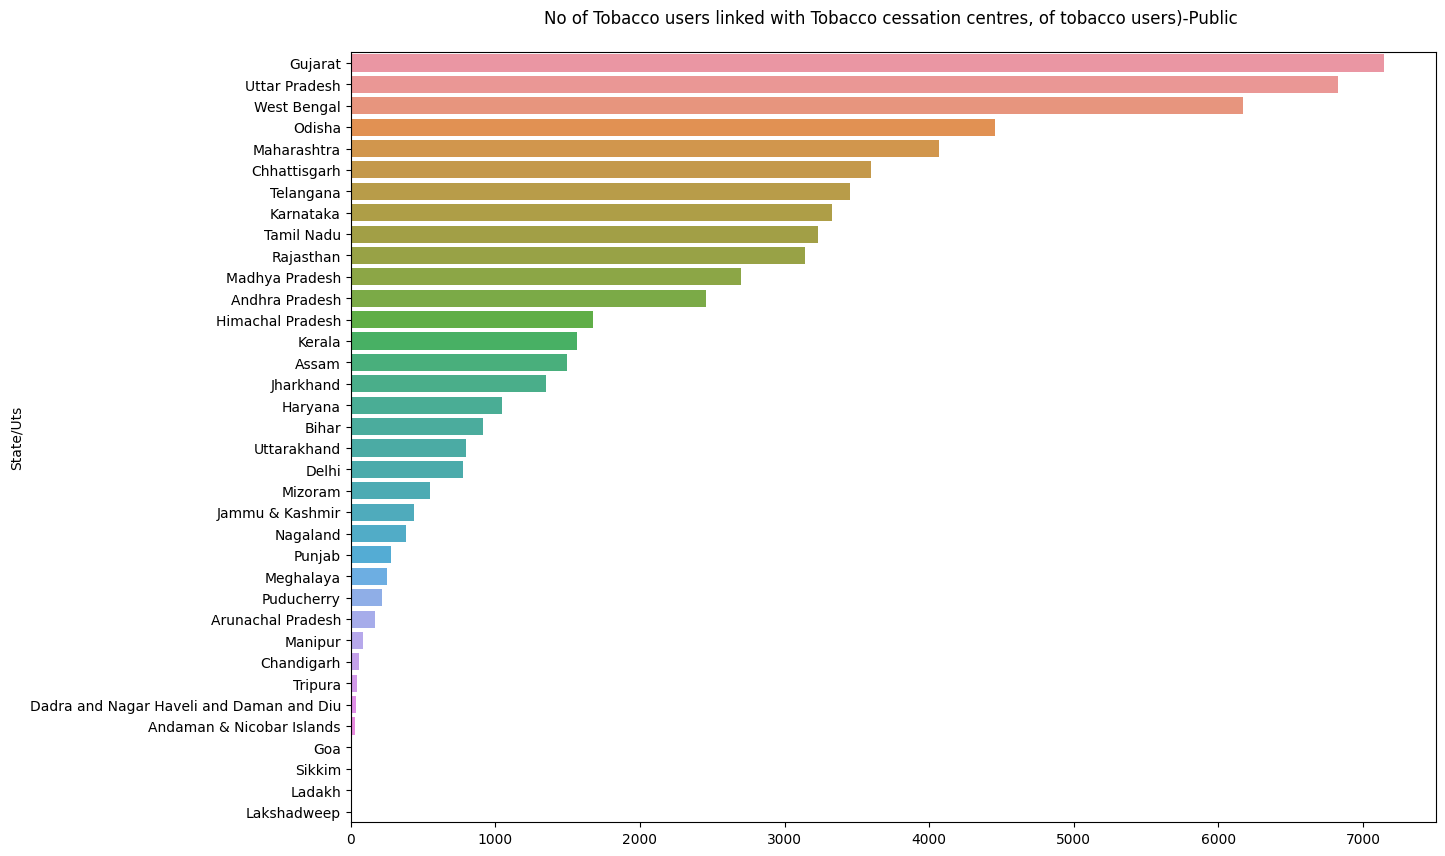

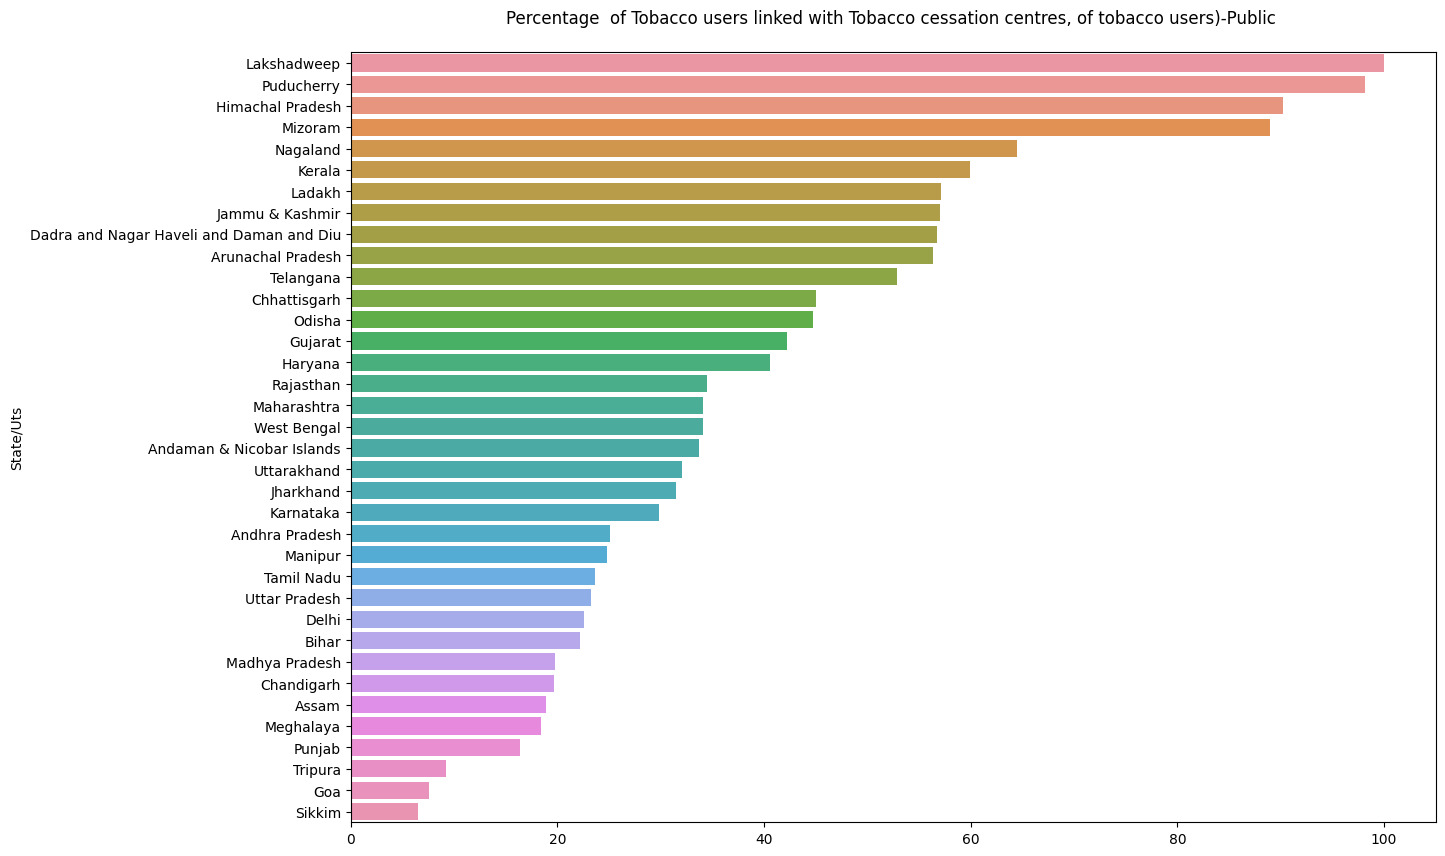

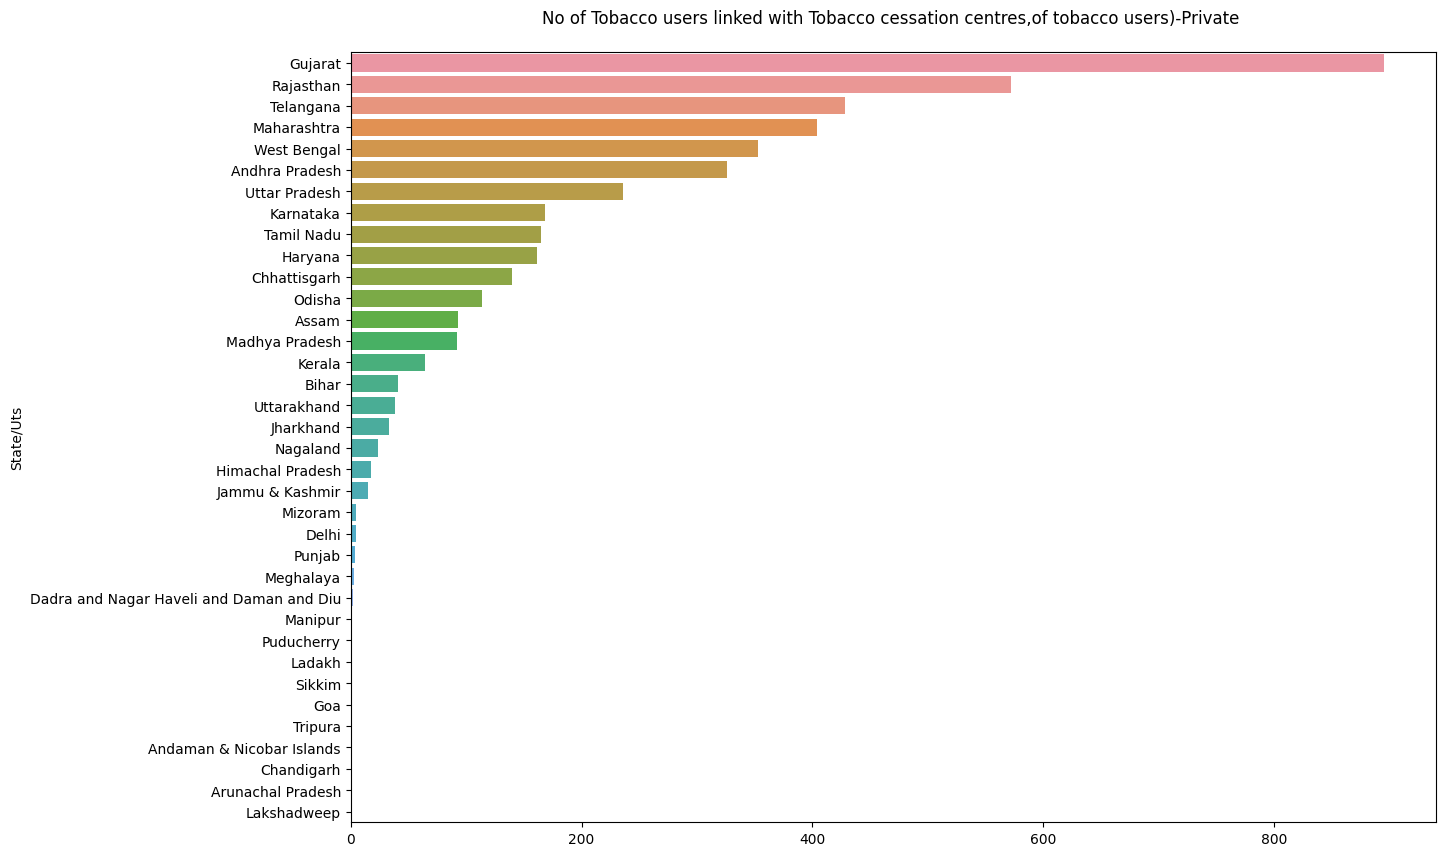

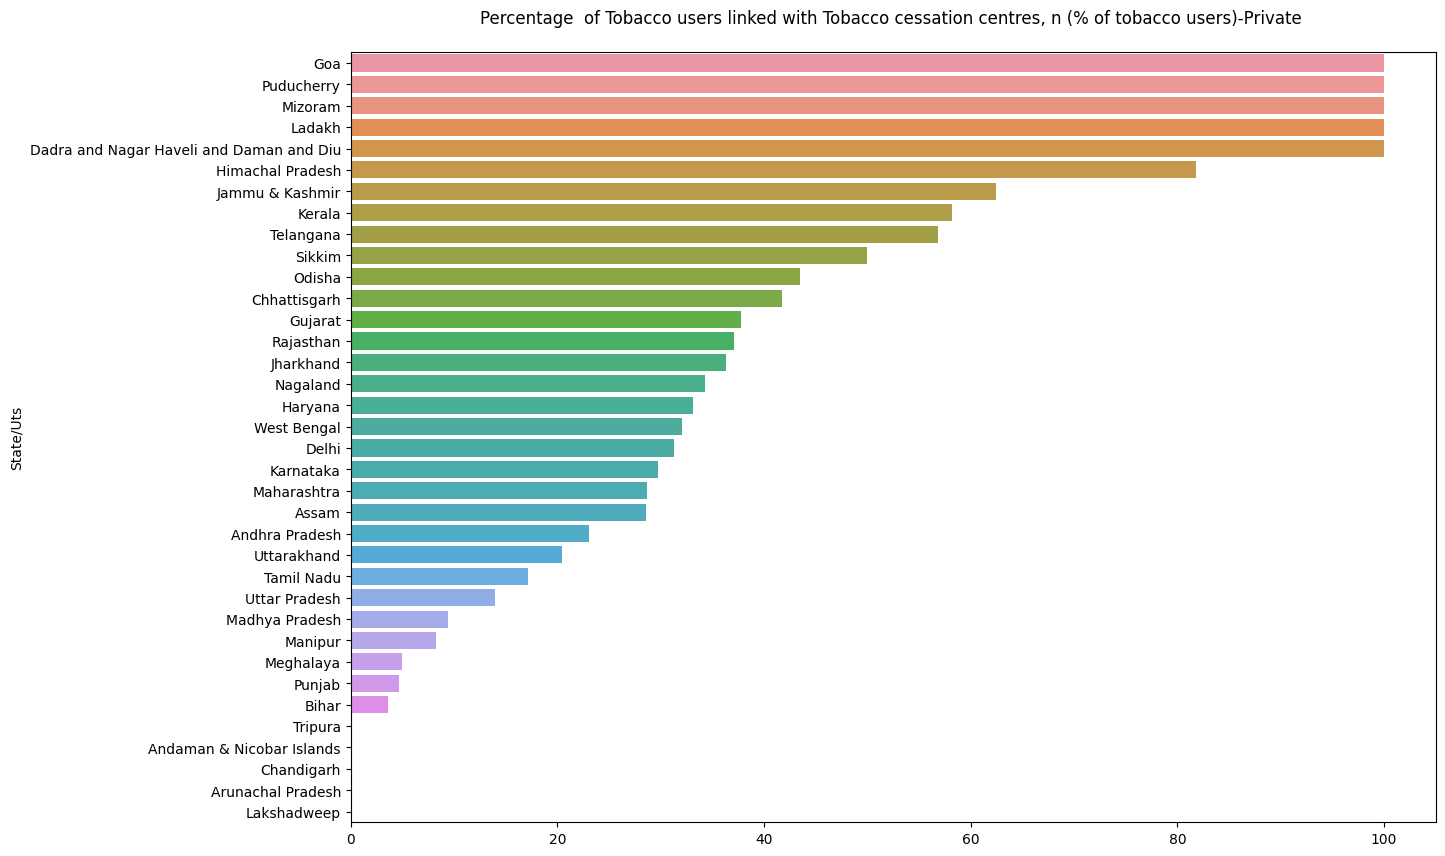

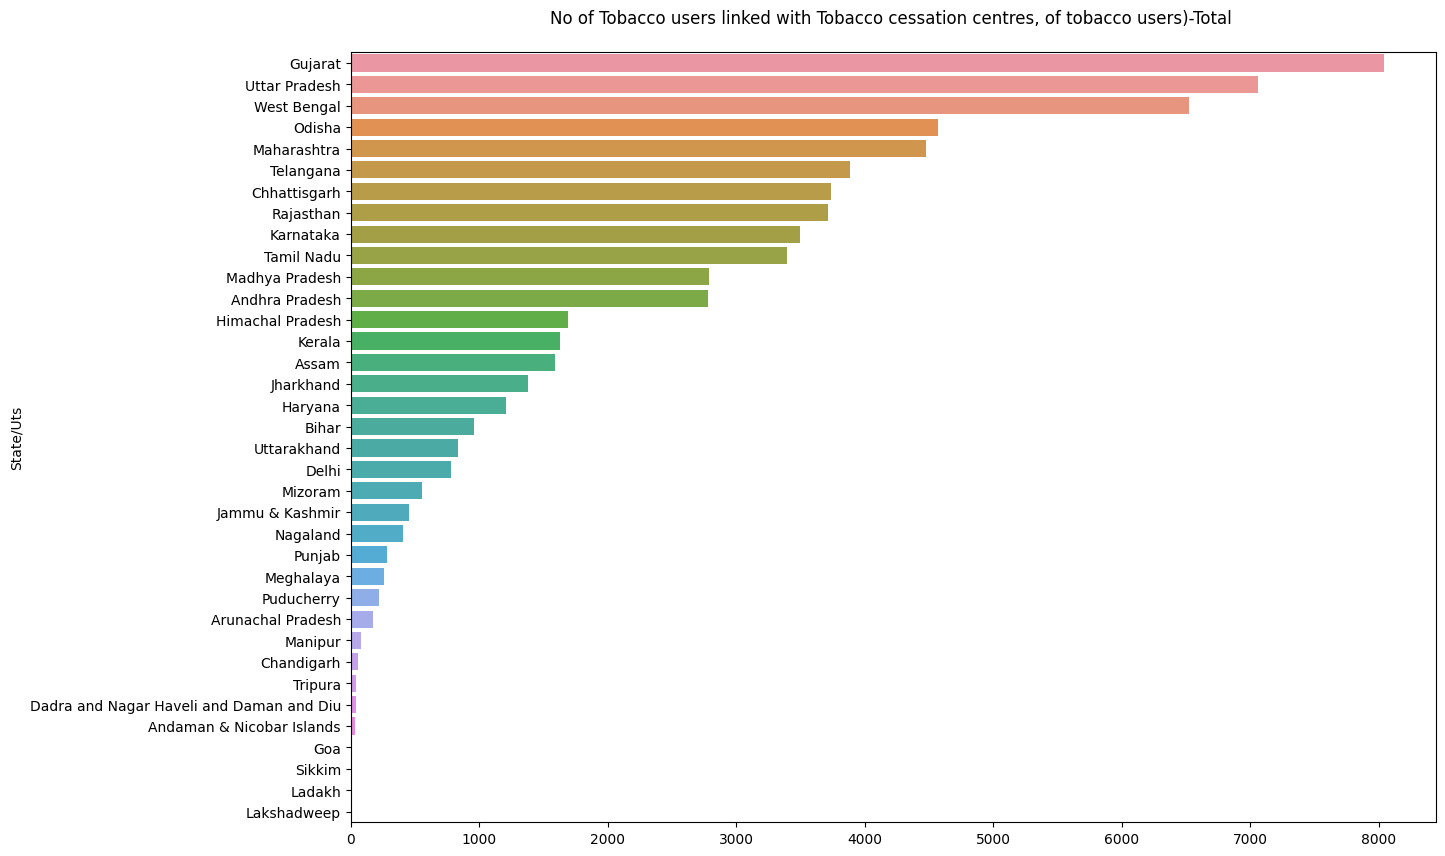

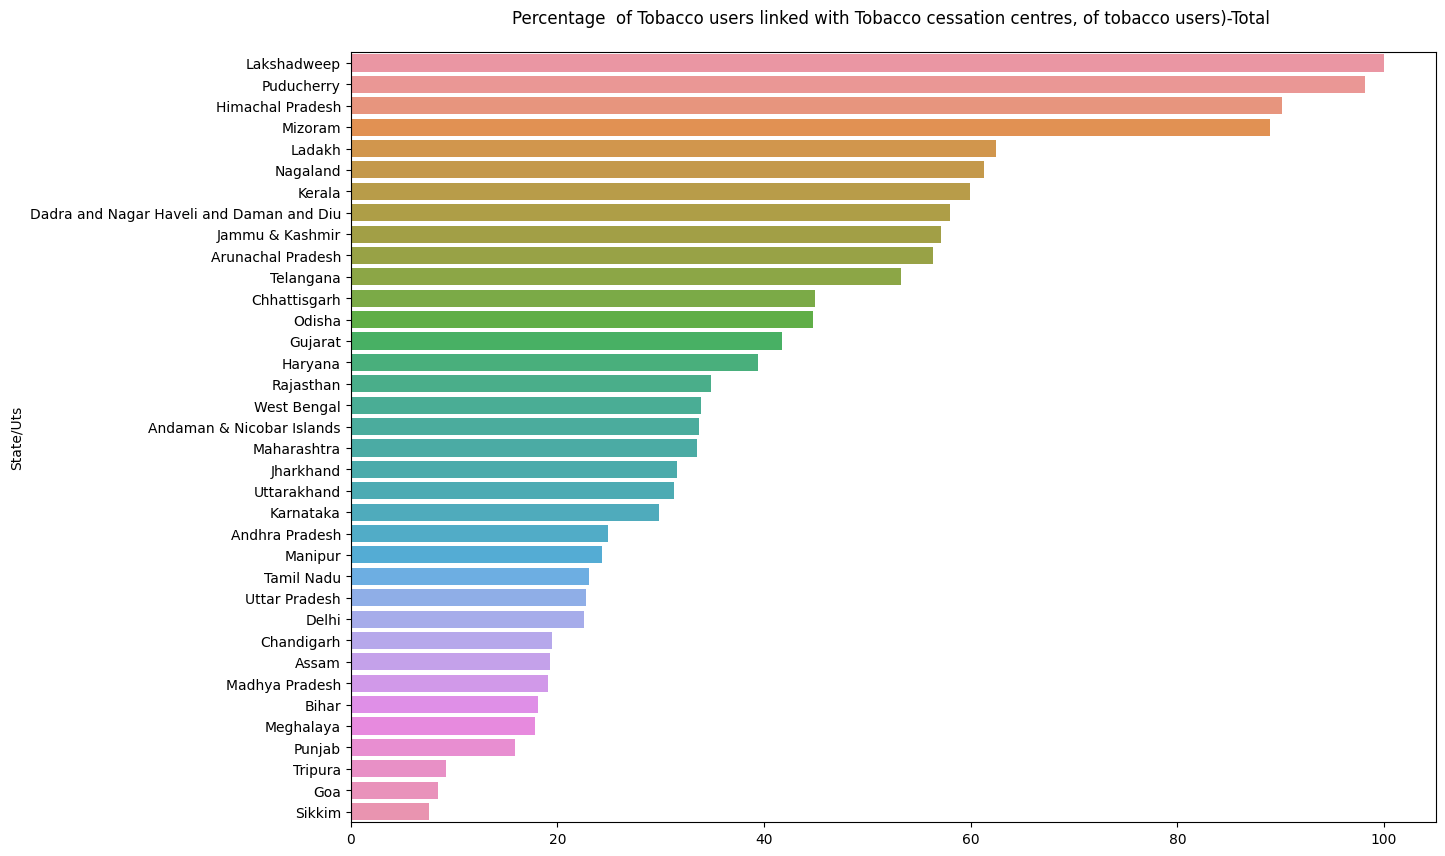

In [50]:
for nombre in tbt.columns[1:]:
    tbt_sorted = tbt.sort_values(by=nombre, ascending=False)
    plt.figure(figsize=(14,10))
    plt.title(f'{nombre} \n')
    sns.barplot(data=tbt_sorted, x=nombre , y="State/Uts")
    plt.xlabel('')
    plt.show()